ID : HDD의 고유 product number

cr_ID : 조립장비의 고유 번호

assembly_time : 조립장비에서 조립이 시작된 시간

eq_ID : 후공정 장비의 고유 번호

process_time : 후공정이 시작된 시간

ramp : ramp라는 부품의 조립 공차를 후공정에서 측정한 값

servo_defect : 후공정에서 측정된 servo sector의 bad sector 개수

data_defect : 후공정에서 측정된 data sector의 bad sector 개수

status : 신뢰성 테스트의 결과

In [ ]:
import pandas as pd
import numpy as np
import os

os.chdir("/content/drive/MyDrive/ML 대회/HDD")
df = pd.read_csv("./train.csv",parse_dates=["assembly_time","process_time"])
df.head()

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass


In [ ]:
# 조립 시작 시간
df["assem_year"] = df["assembly_time"].dt.year
df["assem_month"] = df["assembly_time"].dt.month
df["assem_day"] = df["assembly_time"].dt.day
df["assem_hour"] = df["assembly_time"].dt.hour
df["assem_min"] = df["assembly_time"].dt.minute
df["assem_sec"] = df["assembly_time"].dt.second

# 후공정 시작 시간
df["pro_year"] = df["process_time"].dt.year
df["pro_month"] = df["process_time"].dt.month
df["pro_day"] = df["process_time"].dt.day
df["pro_hour"] = df["process_time"].dt.hour
df["pro_min"] = df["process_time"].dt.minute
df["pro_sec"] = df["process_time"].dt.second

# 후공정 시작 시간 - 조립 시작 시간
df["pro_assem"] = df["process_time"] - df["assembly_time"]
df["pro_assem"] = df["pro_assem"].dt.total_seconds()  # 초 단위로 변환
###여기까지 base###

df["defect_all"] = df["servo_defect"]+df["data_defect"] #총 bad sector 개수
df["ramp_proassem"] = df["ramp"]/df["pro_assem"]  #ramp ratio
###여기까지 base1###

df["data_proassem"] = df["data_defect"]/df["pro_assem"]
###여기까지 data_proassem###

df["ramp_scale"] =np.log1p(df["ramp"])
df["data_scale"] =np.log1p(df["data_defect"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


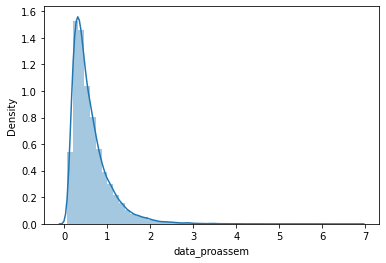

In [ ]:
import seaborn as sns
sns.distplot(df['data_proassem'])

In [ ]:
df['servo_defect'].describe()

count    32000.000000
mean      4182.059000
std       1286.485634
min        -22.000000
25%       3336.000000
50%       4086.000000
75%       4891.000000
max       8318.000000
Name: servo_defect, dtype: float64